In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
data = pd.read_csv('housing.csv')

In [95]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [97]:
data.dropna(inplace=True)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [99]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [101]:
train_data = X_train.join(y_train)

In [102]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17514,-121.92,37.33,52.0,2962.0,557.0,1215.0,506.0,4.7768,<1H OCEAN,301100.0
9093,-118.27,34.68,19.0,552.0,129.0,314.0,106.0,3.2125,INLAND,185400.0
10578,-117.69,33.64,18.0,3783.0,654.0,1843.0,623.0,5.7559,<1H OCEAN,215800.0
7288,-118.22,33.98,42.0,626.0,143.0,625.0,156.0,3.1250,<1H OCEAN,166300.0
357,-122.15,37.76,39.0,1823.0,286.0,763.0,270.0,6.0749,NEAR BAY,196900.0
...,...,...,...,...,...,...,...,...,...,...
17714,-121.79,37.34,20.0,2018.0,328.0,1196.0,323.0,4.9318,<1H OCEAN,262400.0
10105,-117.95,33.92,18.0,2825.0,660.0,1590.0,643.0,3.6106,<1H OCEAN,153600.0
11036,-117.82,33.78,28.0,4485.0,667.0,2048.0,685.0,5.4562,<1H OCEAN,274700.0
10080,-120.24,39.35,8.0,4195.0,725.0,291.0,115.0,3.4792,INLAND,180800.0


In [103]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

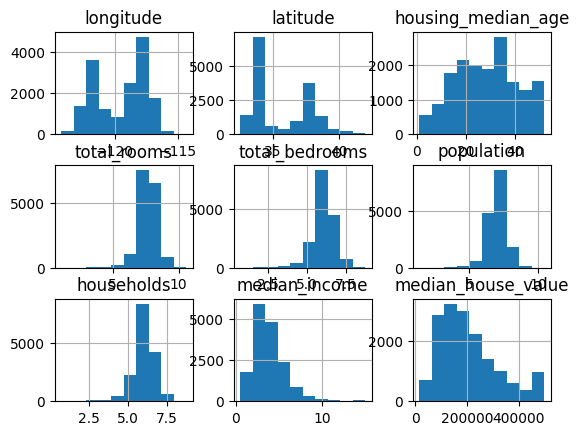

In [104]:
train_data.hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

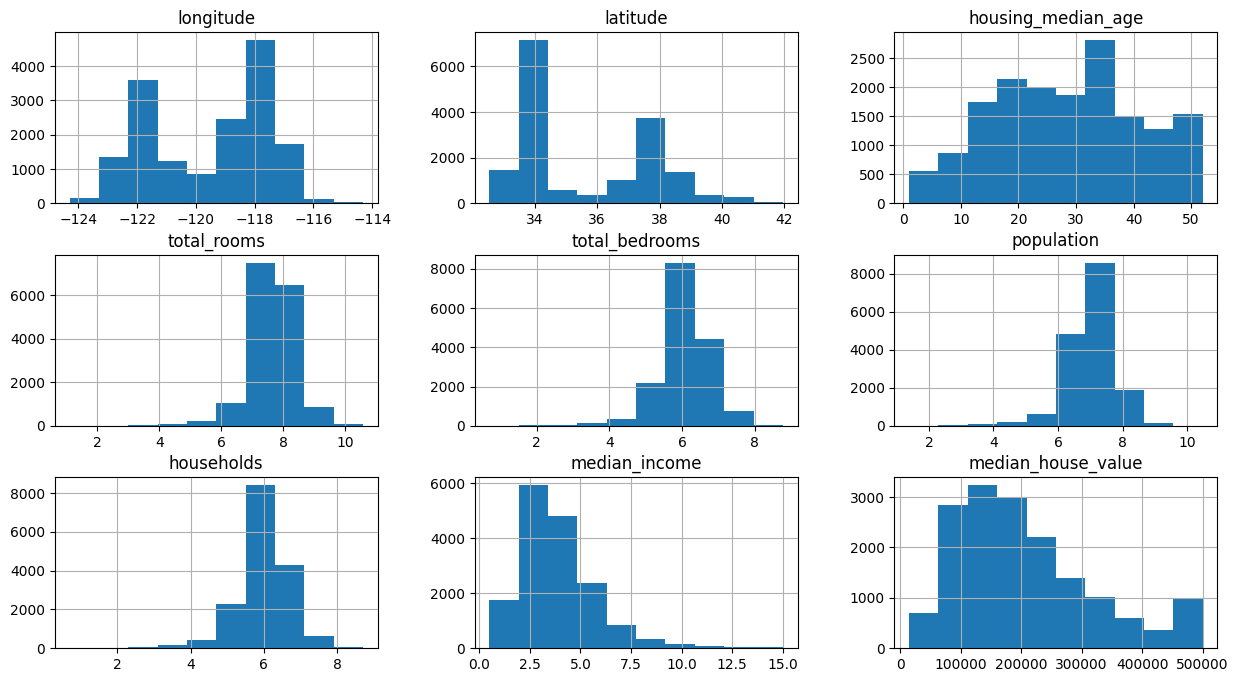

In [105]:
train_data.hist(figsize=(15, 8))

In [106]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [107]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17514,-121.92,37.33,52.0,7.993958,6.324359,7.103322,6.228511,4.7768,301100.0,True,False,False,False,False
9093,-118.27,34.68,19.0,6.315358,4.867534,5.752573,4.672829,3.2125,185400.0,False,True,False,False,False
10578,-117.69,33.64,18.0,8.238537,6.484635,7.519692,6.436150,5.7559,215800.0,True,False,False,False,False
7288,-118.22,33.98,42.0,6.440947,4.969813,6.439350,5.056246,3.1250,166300.0,True,False,False,False,False
357,-122.15,37.76,39.0,7.508787,5.659482,6.638568,5.602119,6.0749,196900.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17714,-121.79,37.34,20.0,7.610358,5.796058,7.087574,5.780744,4.9318,262400.0,True,False,False,False,False
10105,-117.95,33.92,18.0,7.946618,6.493754,7.372118,6.467699,3.6106,153600.0,True,False,False,False,False
11036,-117.82,33.78,28.0,8.408717,6.504288,7.625107,6.530878,5.4562,274700.0,True,False,False,False,False
10080,-120.24,39.35,8.0,8.341887,6.587550,5.676754,4.753590,3.4792,180800.0,False,True,False,False,False


<Axes: >

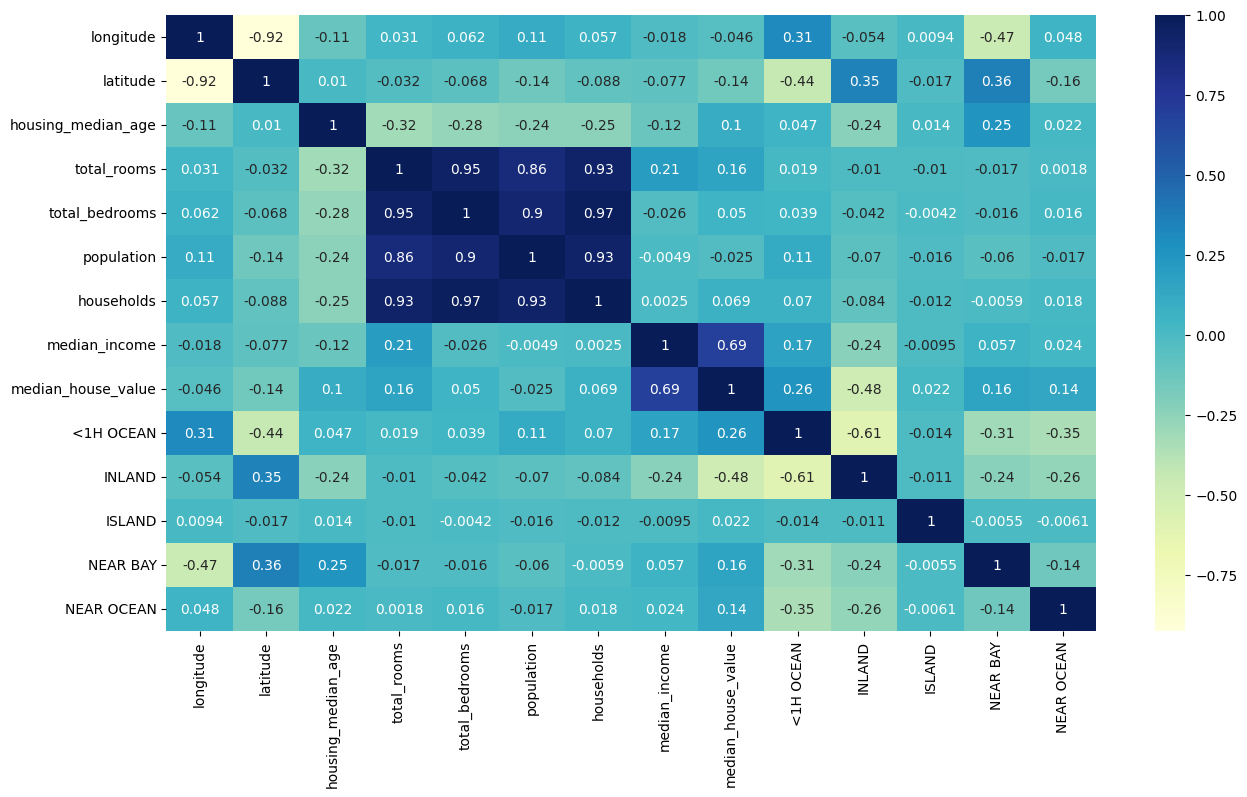

In [108]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

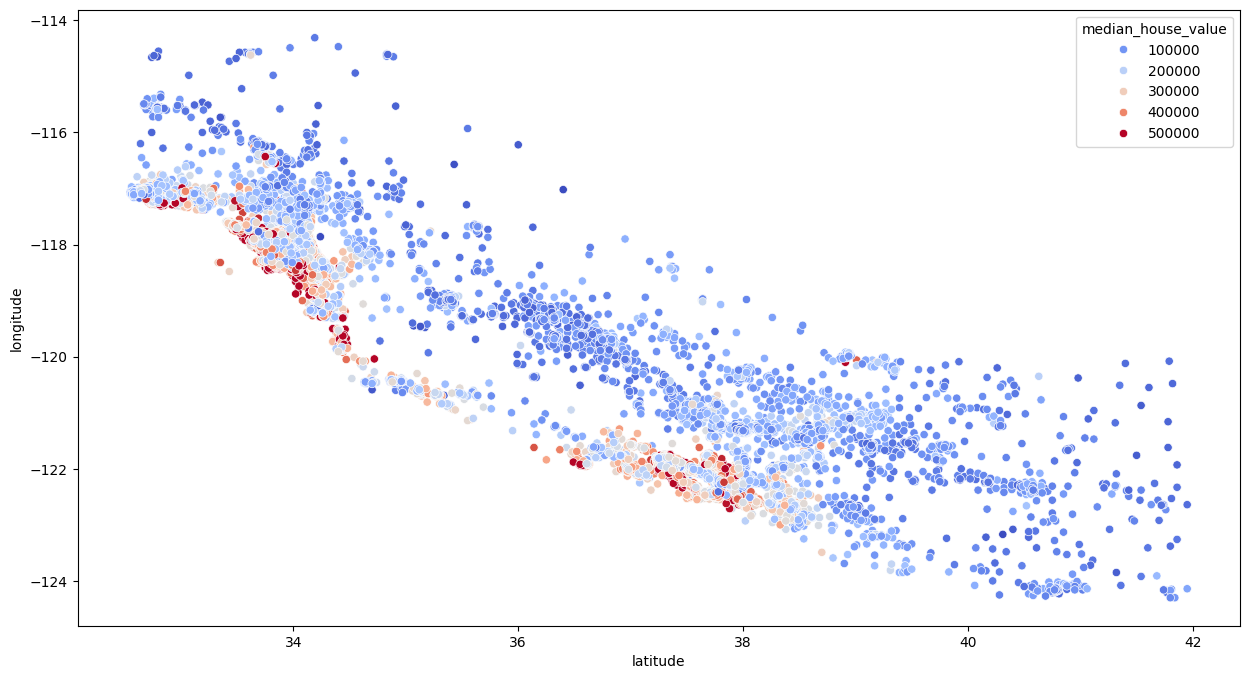

In [109]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [110]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

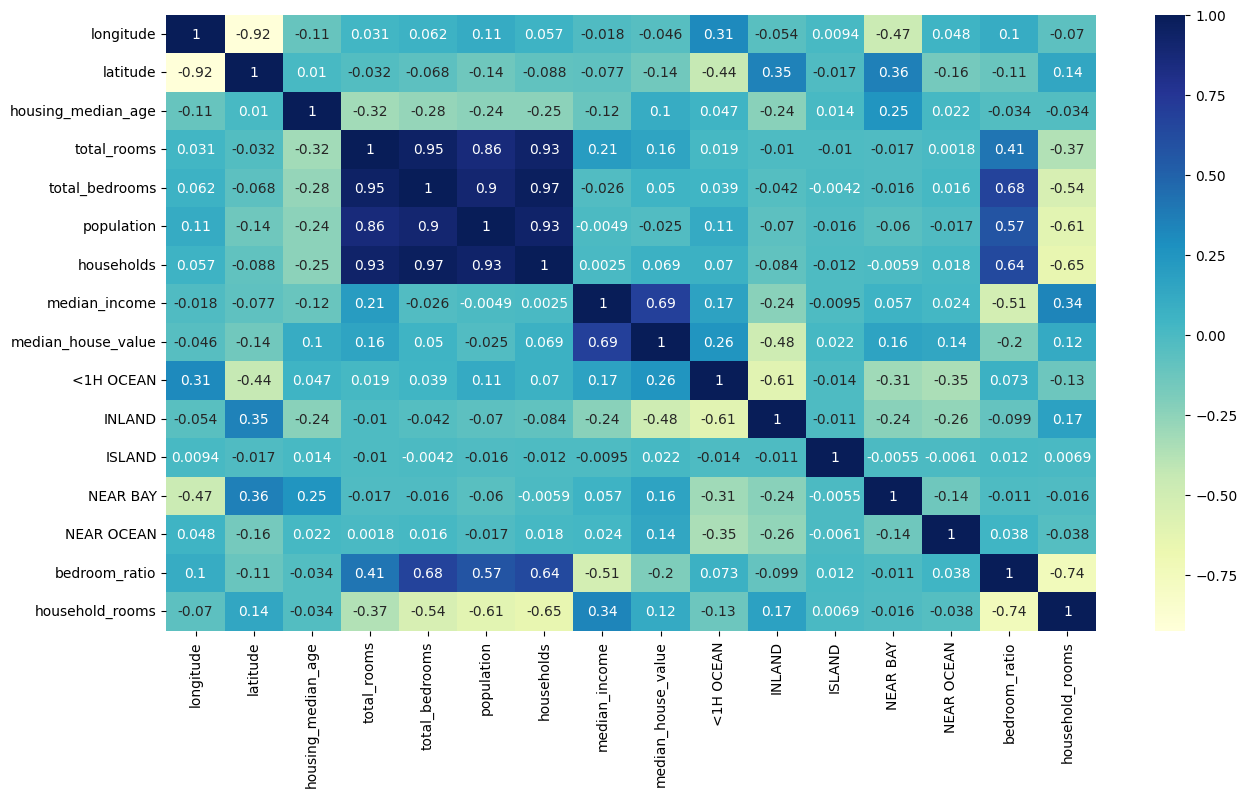

In [111]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

TypeError: TransformerMixin.fit_transform() missing 1 required positional argument: 'X'

In [113]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [114]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [115]:
reg.score(X_test, y_test)

0.6725848485423385

In [125]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [126]:
forest.score(X_test, y_test)

0.8229062292720195

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train, y_train)

In [ ]:
best_forectgrid_search.best_estimator_
best_forest.score(X_test, y_test)